In [1]:
import getpass, time
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import available_backends, execute, register, least_busy

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, matplotlib_circuit_drawer 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
import math

In [3]:
APItoken = getpass.getpass('Please input your token and hit enter: ')
qx_config = {
    "APItoken": APItoken,
    "url":"https://quantumexperience.ng.bluemix.net/api"}
print('Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.')

Please input your token and hit enter: ········
Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.


Our training data are:

$|\psi_{x^0}\rangle = |1\rangle$

$|\psi_{x^1}\rangle = 0.789|0\rangle + 0.615|1\rangle$

Our test data are

$|\psi_{\tilde{x'}}\rangle = - 0.549|0\rangle + 0.836|1\rangle$

$|\psi_{\tilde{x''}}\rangle = 0.053|0\rangle + 0.999|1\rangle$

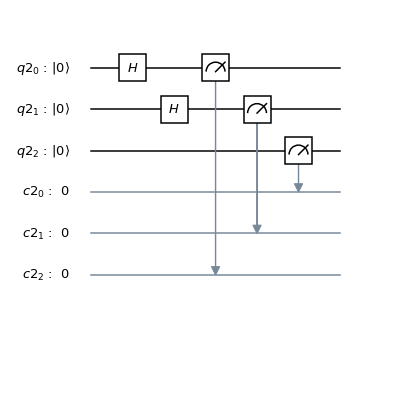

In [6]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.measure(q[0], c[2])
qc.measure(q[1], c[1])
qc.measure(q[2], c[0])
matplotlib_circuit_drawer(qc)

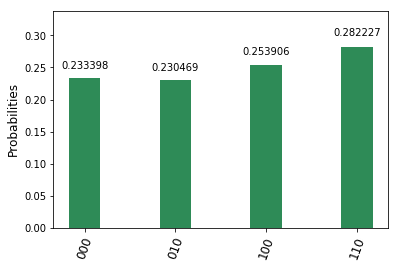

In [7]:
job = execute(qc, backend='local_qasm_simulator', shots=1024)
plot_histogram(job.result().get_counts(qc))

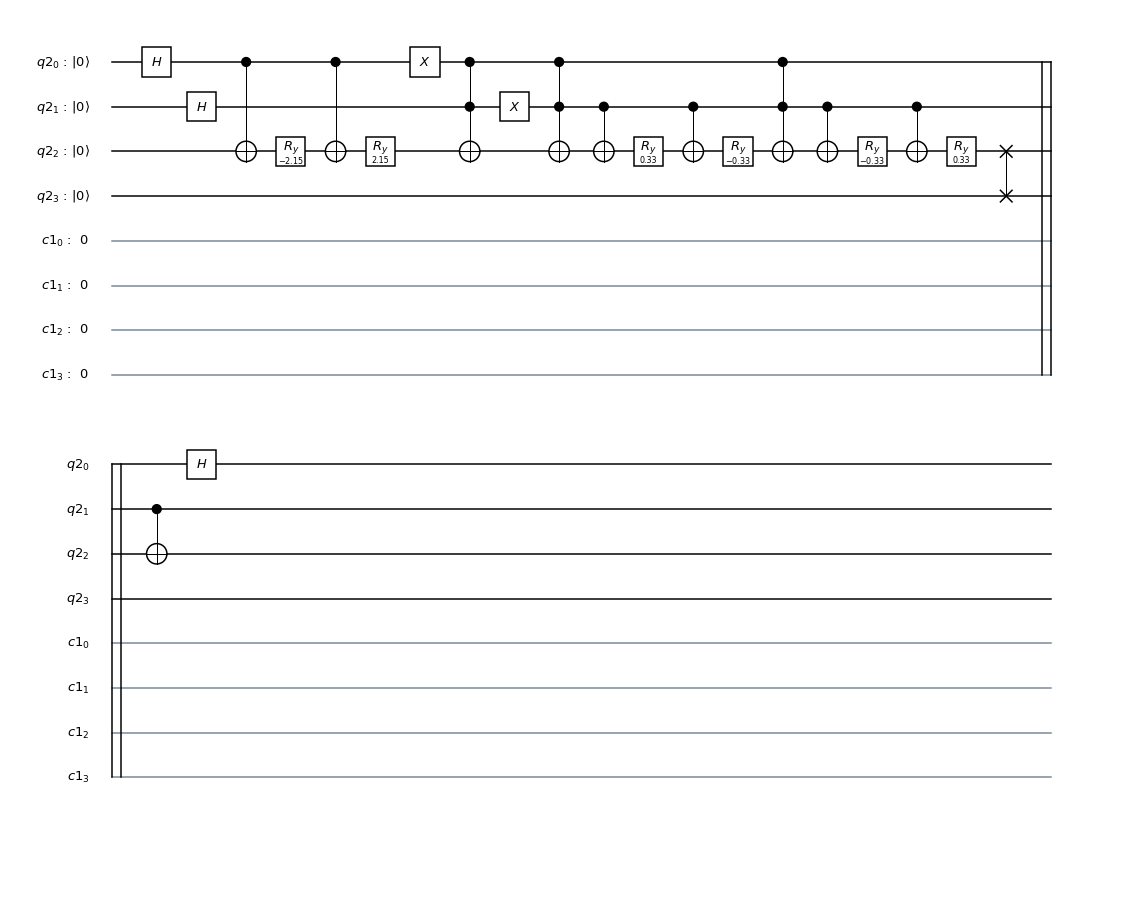

In [9]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.cx(q[0], q[2])
qc.ry(-math.acos(-0.549), q[2])
qc.cx(q[0], q[2])
qc.ry(math.acos(-0.549), q[2])
qc.x(q[0])
qc.ccx(q[0], q[1], q[2])
qc.x(q[1])
qc.ccx(q[0], q[1], q[2])
qc.cx(q[1], q[2])
qc.ry(math.acos(0.789)/2, q[2])
qc.cx(q[1], q[2])
qc.ry(-math.acos(0.789)/2, q[2])
qc.ccx(q[0], q[1], q[2])
qc.cx(q[1], q[2])
qc.ry(-math.acos(0.789)/2, q[2])
qc.cx(q[1], q[2])
qc.ry(math.acos(0.789)/2, q[2])
qc.swap(q[2], q[3])
qc.cx(q[1], q[2])
qc.h(q[0])
matplotlib_circuit_drawer(qc)

In [10]:
job = execute(qc, backend='local_statevector_simulator')
qc_state = job.result().get_statevector(qc)

In [11]:
qc_state

array([-0.19410081 +9.25147465e-17j, -0.19410081 +2.14613680e-17j,
        0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
        0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
        0.08485281 -8.40832459e-17j, -0.47305444 +2.45233369e-16j,
        0.64906122 -3.69812210e-16j, -0.05804556 +3.08018872e-17j,
        0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
        0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
        0.51272862 -1.68253986e-16j,  0.07828703 -1.49925697e-16j])

In [5]:
print("Local backends: ", available_backends({'local': True}))

# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, "local_qasm_simulator", shots = 8192)
sim_result = job_sim.result()

# Show the results
print("simulation: ", sim_result)
print(sim_result.get_counts(qc))

Local backends:  ['local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']
simulation:  COMPLETED
{'0000': 345, '0001': 286, '0110': 53, '0111': 1768, '1000': 3480, '1001': 23, '1110': 2196, '1111': 41}


In [2]:
APItoken = getpass.getpass('Please input your token and hit enter: ')
qx_config = {
    "APItoken": APItoken,
    "url":"https://quantumexperience.ng.bluemix.net/api"}

try:
    register(qx_config['APItoken'], qx_config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

Please input your token and hit enter: ········

You have access to great power!
['ibmq_16_rueschlikon', 'ibmq_5_tenerife', 'ibmq_5_yorktown']


Local backends:  ['local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']
simulation:  COMPLETED
{'00': 509, '11': 515}


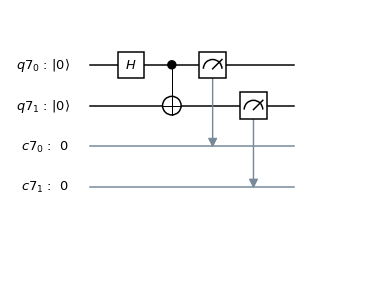

In [20]:
q = QuantumRegister(2)
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(q[0], q[1])
# Add a Measure gate to see the state.
qc.measure(q, c)
matplotlib_circuit_drawer(qc)
# See a list of available local simulators
print("Local backends: ", available_backends({'local': True}))

# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, "local_qasm_simulator")
sim_result = job_sim.result()

# Show the results
print("simulation: ", sim_result)
print(sim_result.get_counts(qc))

In [22]:
print("Local backends: ", available_backends({'local': True}))

# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, "local_qasm_simulator")
sim_result = job_sim.result()

# Show the results
print("simulation: ", sim_result)
print(sim_result.get_counts(qc))

Local backends:  ['local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']
simulation:  COMPLETED
{'000': 296, '010': 247, '101': 246, '111': 235}


In [10]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.h(q[1])
qc.cx(q[0], q[2])
qc.ry(-math.acos(-0.549)/2, q[2])
qc.cx(q[0], q[2])
qc.ry(math.acos(-0.549)/2, q[2])
qc.x(q[0])
qc.ccx(q[0], q[1], q[2])
qc.x(q[1])
qc.ccx(q[0], q[1], q[2])
qc.cx(q[1], q[2])
qc.ry(math.acos(0.789)/2, q[2])
qc.cx(q[1], q[2])
qc.ry(-math.acos(0.789)/2, q[2])
qc.ccx(q[0], q[1], q[2])
qc.cx(q[1], q[2])
qc.ry(-math.acos(0.789)/2, q[2])
qc.cx(q[1], q[2])
qc.ry(math.acos(0.789)/2, q[2])
qc.swap(q[2], q[3])
qc.cx(q[1], q[2])
qc.h(q[0])
drawer(qc)

NameError: name 'drawer' is not defined

In [12]:
backend = available_backends({'simulator': False, 'local': False})
backend

[]

In [7]:
job_exp = execute(qc, 'ibmqx4', shots=1024, max_credits=10)
result = job_exp.result()

LookupError: backend "ibmqx4" not found.

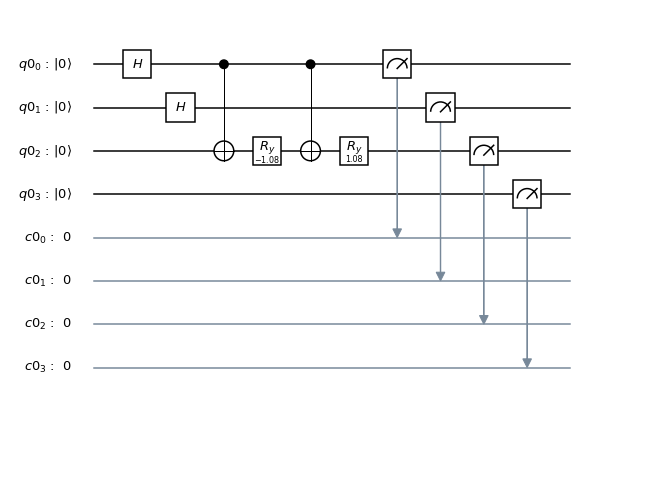

In [3]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.cry(math.acos(-0.549), q[0], q[2])
qc.measure(q,c)
matplotlib_circuit_drawer(qc)

In [9]:
job_sim = execute(qc, "local_qasm_simulator")
sim_result = job_sim.result().get_counts(qc)
sim_result

{'0000': 252, '0001': 69, '0010': 270, '0011': 58, '0101': 174, '0111': 201}

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

In [17]:
data, target = datasets.load_iris(True)
data = StandardScaler().fit_transform(data)
data = normalize(data)

In [21]:
data

array([[-0.38761701,  0.44415599, -0.57722979, -0.56505246],
       [-0.51928383, -0.05676947, -0.60935325, -0.59649824],
       [-0.57964843,  0.14135986, -0.58499802, -0.54936546],
       [-0.63354328,  0.04476391, -0.54013684, -0.55215151],
       [-0.41160025,  0.50892109, -0.54026381, -0.52886632],
       [-0.20919003,  0.76236403, -0.45588948, -0.40890757],
       [-0.60969183,  0.32402636, -0.54281559, -0.4781569 ],
       [-0.45431978,  0.35597535, -0.57105438, -0.58375678],
       [-0.67521844, -0.13758777, -0.5178538 , -0.50692908],
       [-0.50843685,  0.04734903, -0.57132987, -0.64252021],
       [-0.2212128 ,  0.61559322, -0.52892604, -0.54069134],
       [-0.54052761,  0.34233582, -0.52485982, -0.56138958],
       [-0.53908823, -0.05328586, -0.57196082, -0.61595887],
       [-0.66596618, -0.04450078, -0.53841763, -0.51440761],
       [-0.01786734,  0.74492122, -0.4951245 , -0.44679398],
       [-0.0491545 ,  0.88154117, -0.36352241, -0.29718758],
       [-0.20049547,  0.